This Jupiter Notebook Contains the codebases related to following components.

* GoPro Social Media Data Retrieval
* GoPro Social Media Data Analysis and Predictions
* GoPro Analytical Results Dashboading

Install these libraries - 
pip install pandas
pip install numpy
pip install matplotlibI

Data retrieving from the gopro_data MySQL database

pip install mysql-connector-python

In [36]:
import pandas as pd
import mysql.connector
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

"""
Fetch the data from the 'gopro_data' database.
"""

# Create a connection to the gopro_data database 
db_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    # password='Mydb@321',
    database='gopro_data'
)
db_cursor = db_connection.cursor()

# Execute the query and convert the results to a Pandas DataFrame
gopro_channels_query = "SELECT * FROM gopro_channels"
gopro_channels_df = pd.read_sql_query(gopro_channels_query, db_connection)

# Execute the query and convert the results to a Pandas DataFrame
gopro_channels_query = "SELECT * FROM gopro_posts"
gopro_posts_df = pd.read_sql_query(gopro_channels_query, db_connection)

# Execute the query and convert the results to a Pandas DataFrame
gopro_comments_query = "SELECT * FROM youtube_comments"
gopro_comments_df = pd.read_sql_query(gopro_comments_query, db_connection)

# Display the GoPro DataFrame
print(gopro_channels_df)
print(gopro_posts_df)
print(gopro_comments_df)

#Close the cursor and connection
if db_connection.is_connected():
    db_cursor.close()
    db_connection.close()
    print("MySQL connection is closed.")

   id                channel_id channel_type  \
0   1  UCqhnX4jA0A5paNd1v-zEysw      youtube   
1   2          GoPro.com/HERO12       tiktok   
2   3                  28902942    instagram   

                                         description  title  post_count  \
0  GoPro helps the world to capture and share its...  GoPro        2591   
1                                               None  GoPro         316   
2  We help the world to capture and share itself ...  GoPro        7823   

   followers_count  engagement_count  published_datetime  
0         10900000      3.451699e+09 2009-03-11 07:57:57  
1          2900000      4.270000e+07                 NaT  
2         20636676               NaN                 NaT  
    id              post_id channel_type post_type  \
0    1          Im8HPvQ0yys      youtube     video   
1    2          a9PdU9xQeXk      youtube     video   
2    3          sB60FSm6fcw      youtube     video   
3    4          XBoqsmBYG4Q      youtube     video   


/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/1976012530.py:22: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/1976012530.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/1976012530.py:30: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



I) GoPro User Engagement Analysis 

In [37]:
gopro_channel_df = {
    'channel_type': gopro_channels_df['channel_type'],
    'followers': gopro_channels_df['followers_count'],
    'posts': gopro_channels_df['post_count']
}

# Create a new 'gopro_channel_data_table' DataFrame with the selected columns
gopro_channel_data_table = pd.DataFrame(gopro_channel_df)
gopro_channel_data_table

,channel_type,followers,posts
0,youtube,10900000,2591
1,tiktok,2900000,316
2,instagram,20636676,7823


GoPro Posts Engagement Analysis

Engagement rate by posts Calculation (https://www.socialinsider.io/blog/engagement-rate/)

Engagement Rate per post by followers = ( Reactions + Comments) / Total Followers × 100
Engagement Rate per post by viewers =  ( Reactions + Comments) / Total Viewers × 100

In [38]:
# GoPro engagement rate by SM posts calculation

# Create a data frame of channel_type and followers_count
gopro_follower_data = {
   'channel_type': gopro_channels_df['channel_type'],
    'followers_count': gopro_channels_df['followers_count'],
    'posts_count': gopro_channels_df['post_count']
}

gopro_follower_counts_df = pd.DataFrame(gopro_follower_data)

# Merge the gopro_posts_df and gopro_follower_counts_df DataFrames on channel_type
gopro_merged_eng_df = pd.merge(gopro_posts_df, gopro_follower_counts_df, on='channel_type')

# Calculate GoPro post engagement rate by followers
gopro_merged_eng_df['gopro_engagement_rate_followers'] = (
    (gopro_merged_eng_df['likes_count'] + gopro_merged_eng_df['comments_count']) /
    gopro_merged_eng_df['followers_count'] * 100
).round(2)

# Calculate GoPro post engagement rate by viewers
gopro_merged_eng_df['engagement_rate_viewers'] = (
    (gopro_merged_eng_df['likes_count'] + gopro_merged_eng_df['comments_count']) /
    gopro_merged_eng_df['views_count'] * 100
).round(2)

# Create a dataframe for publish post statistics into table
gopro_post_stats = {   
    'Post_id': gopro_merged_eng_df['post_id'],
    'channel_type': gopro_merged_eng_df['channel_type'],
    'Post_type': gopro_merged_eng_df['post_type'],
    'Likes': gopro_merged_eng_df['likes_count'],
    'Comments': gopro_merged_eng_df['comments_count'],
    'Views': gopro_merged_eng_df['views_count'],
    'Engagement_rate_followers': gopro_merged_eng_df['gopro_engagement_rate_followers'],
    'Engagement_rate_viewers': gopro_merged_eng_df['engagement_rate_viewers'],
    'Publish_date': gopro_merged_eng_df['post_date']
}
gopro_post_stats_df = pd.DataFrame(gopro_post_stats)
gopro_post_stats_df

,Post_id,channel_type,Post_type,Likes,Comments,Views,Engagement_rate_followers,Engagement_rate_viewers,Publish_date
0,Im8HPvQ0yys,youtube,video,517,64,9059.0,0.01,6.41,2023-10-06
1,a9PdU9xQeXk,youtube,video,2211,15,36251.0,0.02,6.14,2023-10-02
2,sB60FSm6fcw,youtube,video,14688,66,283265.0,0.14,5.21,2023-10-01
3,XBoqsmBYG4Q,youtube,video,4889,15,91775.0,0.04,5.34,2023-09-29
4,0h1aX7fQn3Y,youtube,video,788,33,19630.0,0.01,4.18,2023-09-29
...,...,...,...,...,...,...,...,...,...
91,3205639297159313238,instagram,image,14503,32,NaN,0.07,NaN,2023-10-03
92,3205497410775040108,instagram,video,30733,1566,934127.0,0.16,3.46,2023-10-03
93,3204875258656204133,instagram,image,17546,40,NaN,0.09,NaN,2023-10-02
94,3204169680524383287,instagram,image,21246,48,NaN,0.10,NaN,2023-10-01


GoPro Posts - Likes vs. Comments
This could be useful for identifying posts that are generating a lot of conversation and engagement.

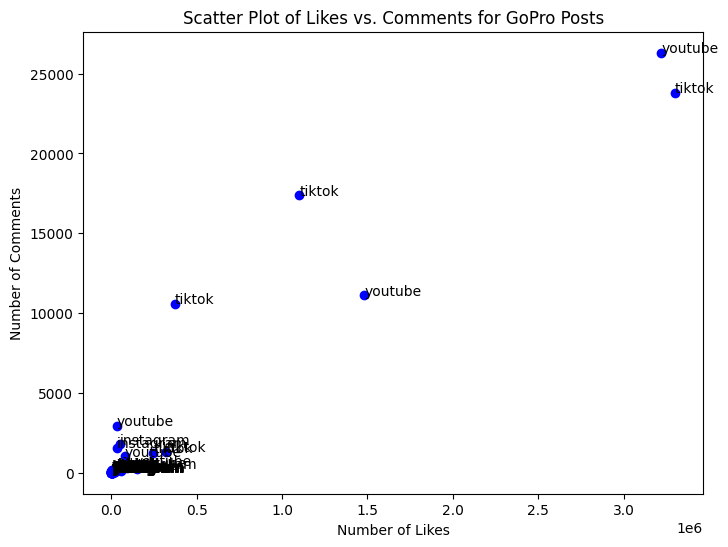

In [39]:
# GoPro Posts - Likes vs. Comments

likes_comments_data = {
    'post_id': gopro_posts_df['post_id'],
    'channel_type': gopro_posts_df['channel_type'],
    'Likes': gopro_posts_df['likes_count'],
    'Comments': gopro_posts_df['comments_count'],
    'post_date': gopro_posts_df['post_date']
}

likes_comments_df = pd.DataFrame(likes_comments_data)

# GoPro Likes vs. Comments Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(likes_comments_df['Likes'], likes_comments_df['Comments'], color='blue', marker='o')

plt.title('Scatter Plot of Likes vs. Comments for GoPro Posts')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Comments')

# Annotate each point with the channel_type
for i, row in likes_comments_df.iterrows():
    plt.annotate(row['channel_type'], (row['Likes'], row['Comments']))

plt.show()


 GoPro Posts - Time Series Analysis
 Analyze user engagement over time to identify posting patterns

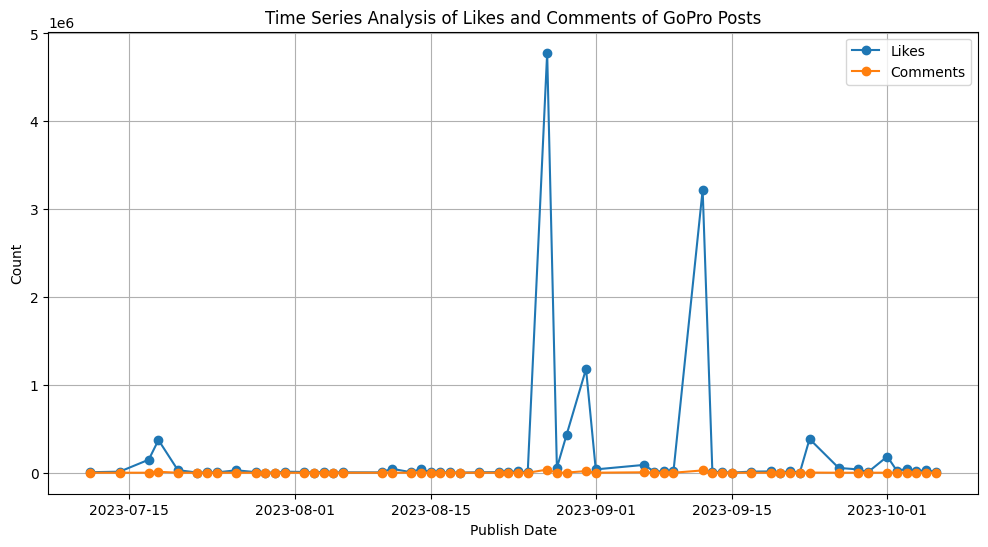

In [40]:
# GoPro Posts - Time Series Analysis

gopro_time_series_data = {
    'post_id': gopro_posts_df['post_id'],
    'channel_type': gopro_posts_df['channel_type'],
    'Likes': gopro_posts_df['likes_count'],
    'Comments': gopro_posts_df['comments_count'],
    'post_date': gopro_posts_df['post_date']
}

gopro_time_series_df = pd.DataFrame(gopro_time_series_data)

# Convert 'post_date' to datetime
gopro_time_series_df['post_date'] = pd.to_datetime(gopro_time_series_df['post_date'])

# Group by 'post_date' and aggregate 'Likes', 'Comments', and 'Shares'
time_series_grouped_df = gopro_time_series_df.groupby('post_date').agg({
    'Likes': 'sum',
    'Comments': 'sum',
}).reset_index()

# GoPro Time Series Analysis Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series_grouped_df['post_date'], time_series_grouped_df['Likes'], label='Likes', marker='o')
plt.plot(time_series_grouped_df['post_date'], time_series_grouped_df['Comments'], label='Comments', marker='o')

plt.title('Time Series Analysis of Likes and Comments of GoPro Posts')
plt.xlabel('Publish Date')
plt.ylabel('Count')

plt.legend()
plt.grid(True)
plt.show()

II) Diffusion of Information

Here, I selected users as nodes and commented posts as edges to track how information about a post is spread from user to user
Shares are the better form of data to analyse diffussion of information, but Youtube data API, Tik Tok or Instagram scraping libraries does not exposing the data related to the Post Shared users.
Youtube posts are taken for the analysis

This graph can be used to visualize how information about each post was spread from user to user through comments. For example, you can see which posts generated the most comments, and you can see which users are most likely to comment on other users' posts.

Using NetworkX Library for the Network Analysis - pip install networkx

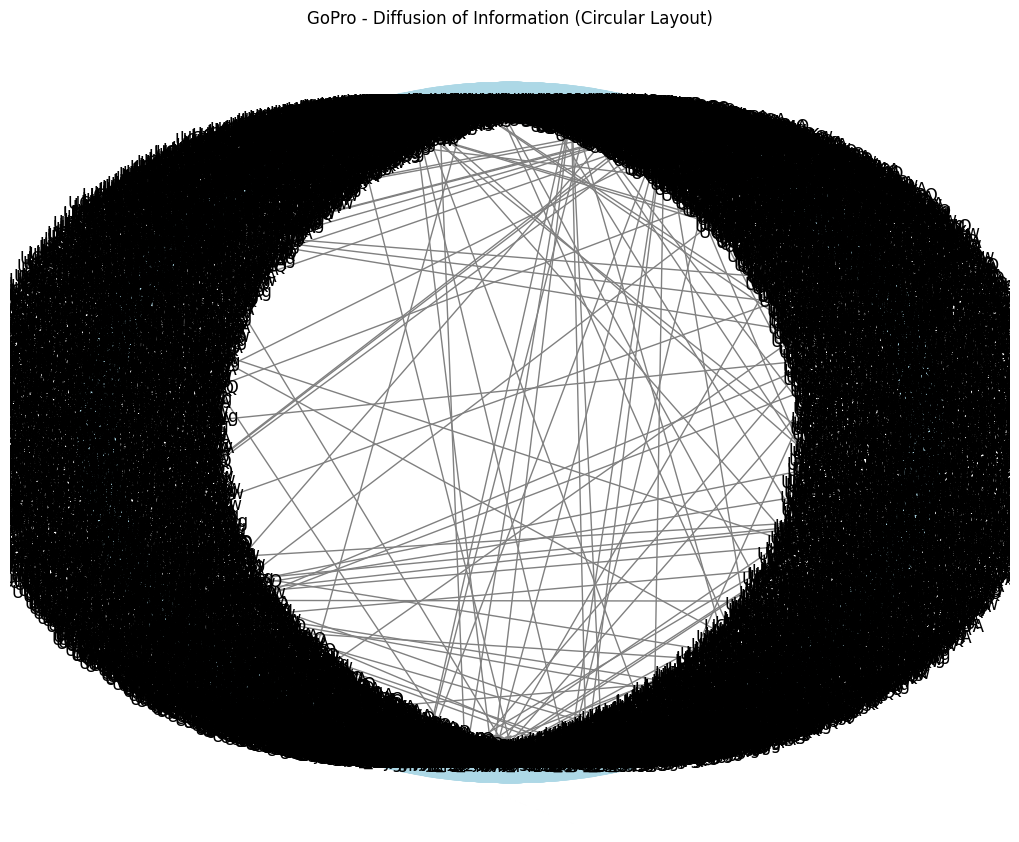

,gopro_user_id,commented_user_x,influence_score,comment_id,post_id,comment_text,commented_user_id,commented_user_y,post_date,comment_date
0,UC-GaOr5CIApxtrzVOe9n8mg,Jayden Lawson,0.006911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UCUUid8Jb0_DLCq94EGwN6bQ,Pete R,0.006911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UCqWH1XPwP7yzFMiJy4uBGhQ,Burakgulerstore,0.004785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UCtzkCk0-AG9WkuNfCEIj0nw,Dystopic,0.004253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UCiZFFD_HcPZ-49R3Eci-MOA,Markiyan Hapyak,0.002658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UCQm0NRXCRzoHvGB0qeyjgEQ,MrLandShark2000,0.002658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UCKtIFKEIxXAaEbsDGFbhYjg,Alix Hasner,0.002127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,UC4GKt7Yi1BmHuwlUE1f9yRQ,Gelsoftforlife,0.002127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,UCsPHh46gw2v6Dcdcc-Nt4NA,Richard Barkway-Smith,0.002127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,UCNndIWV5iGmGGkKrv7Um4vA,David Silberhorn,0.002127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
import networkx as nx

# GoPro Posts - Diffusion of Information Anaysis
# Nodes - Commented Users
# Edges - Posts

gopro_diff_info_data = {
    'comment_id': gopro_comments_df['comment_id'],
    'post_id': gopro_comments_df['video_id'],
    'comment_text': gopro_comments_df['comment_text'],
    'commented_user_id': gopro_comments_df['commenter_id'],
    'commented_user': gopro_comments_df['commenter_name'],
    'post_date': gopro_comments_df['comment_post_date'],
    'comment_date': gopro_comments_df['comment_post_date']
}
gopro_diff_info_df = pd.DataFrame(gopro_diff_info_data)

#limit data to 100 rows
# gopro_diff_info_df = gopro_diff_info_df.head(100)

gopro_network_graph = nx.from_pandas_edgelist(gopro_diff_info_df, 'commented_user_id', 'post_id', create_using=nx.DiGraph())

"""
    Visualize the GoPro network graph
"""

plt.figure(figsize=(10, 8))
gopro_pos = nx.circular_layout(gopro_network_graph)
nx.draw(gopro_network_graph, gopro_pos, with_labels=True, node_size=800, node_color='lightblue', edge_color='gray', linewidths=0.5)
plt.title('GoPro - Diffusion of Information (Circular Layout)')
plt.show()

"""
    GoPro Influential Users Identification
"""

# # Calculate degree centrality
gopro_degree_centrality = nx.degree_centrality(gopro_network_graph)

for gopro_user_id, centrality in gopro_degree_centrality.items():
    gopro_centrality_dict = {gopro_user_id: centrality for gopro_user_id, centrality in gopro_degree_centrality.items()}
    # create a pandas dataframe from the dictionary
    gopro_centrality_df = pd.DataFrame(list(gopro_centrality_dict.items()), columns=['gopro_user_id', 'centrality'])
    
# Data Cleaning - remove post_id related centrality values
gopro_centrality_merged_df = pd.merge(gopro_centrality_df, gopro_diff_info_df, left_on='gopro_user_id', right_on='post_id', how='left', indicator=True)

# Filter out rows where the indicator column is 'both' (i.e. the user is a post_id)
gopro_filtered_df = gopro_centrality_merged_df[gopro_centrality_merged_df['_merge'] == 'left_only']
gopro_filtered_df = gopro_filtered_df.drop(columns=['_merge'])

# Get the top 10 most influential users IDs
gopro_most_influential_user_ids = gopro_filtered_df.sort_values(by=['centrality'], ascending=False).head(10)

# Identify the commented_user in the gopro_diff_info_df data frame by gopro_most_influential_user_ids
gopro_desired_user_ids = gopro_most_influential_user_ids['gopro_user_id'].tolist()

# Create a dictionary with the user IDs and their corresponding names
gopro_influential_users = {}
for gopro_desired_user_id in gopro_desired_user_ids:
    gopro_desired_user = gopro_diff_info_df[gopro_diff_info_df['commented_user_id'] == gopro_desired_user_id]['commented_user'].unique().tolist()
    gopro_influential_users[gopro_desired_user_id] = gopro_desired_user[0]

# Convert the dictionary to a dataframe
gopro_influential_users_df = pd.DataFrame(list(gopro_influential_users.items()), columns=['gopro_user_id', 'commented_user'])

# Merge the two data frames on the 'gopro_user_id' column
gopro_influential_users_df = pd.merge(gopro_influential_users_df, gopro_most_influential_user_ids, on='gopro_user_id')
gopro_influential_users_df = gopro_influential_users_df.rename(columns={'centrality': 'influence_score'})
gopro_influential_users_df

III) HashTag Analysis of the GoPro Posts

Using WordCloud Library for the Hashtag Analysis - pip install wordcloud

pip install wordcloud

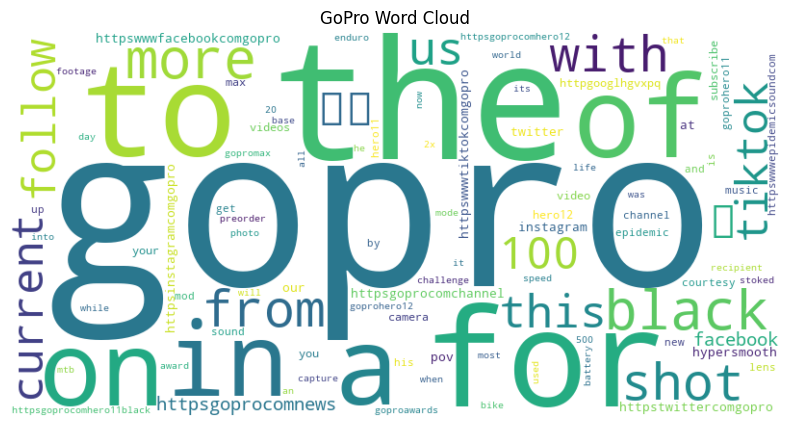

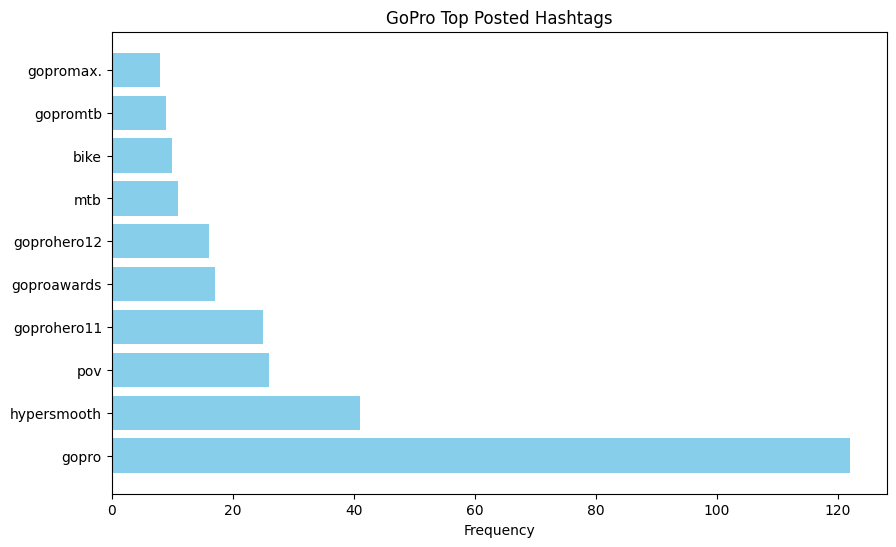

In [42]:
from collections import Counter
from wordcloud import WordCloud
import string

"""
Identifying the most popular hashtags
"""
gopro_hashtags_data = {
    'post_id': gopro_posts_df['post_id'],
    'channel_type': gopro_posts_df['channel_type'],
    'post_description': gopro_posts_df['post_description'],
    'post_date': gopro_posts_df['post_date']
}
gopro_hashtags_df = pd.DataFrame(gopro_hashtags_data)

# Data Cleaning, Token Extraction
gopro_cleaned_desc = [desc.lower().translate(str.maketrans('', '', string.punctuation)) for desc in gopro_hashtags_df['post_description']]
gopro_tokens = [gopro_word for post_desc in gopro_cleaned_desc for gopro_word in post_desc.split()]

# Hashtag Extraction
gopro_hashtag_desc = [post_desc.lower() for post_desc in gopro_hashtags_df['post_description']]
hashtag_tokens = [post_word.lower() for post_desc in gopro_hashtag_desc for post_word in post_desc.split()]
gopro_hashtags = [gopro_token[1:] for gopro_token in hashtag_tokens if gopro_token.startswith("#")]

# Calculate the frequency of the GoPro tokens and hashtags
gopro_token_frequency = Counter(gopro_tokens)
gopro_hashtag_frequency = Counter(gopro_hashtags)

# Identify Most Frequent GoPro Tokens
gopro_most_common_tokens = gopro_token_frequency.most_common(10)
gopro_most_common_hashtags = gopro_hashtag_frequency.most_common(10)

# Visualization of GoPro Word Cloud
gopro_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(gopro_token_frequency)
gopro_wordcloud.to_image().save('gopro_wordcloud.png')

plt.figure(figsize=(10, 5))
plt.imshow(gopro_wordcloud, interpolation='bilinear')
plt.title('GoPro Word Cloud')
plt.axis('off')
plt.show()

# Visualization of GoPro hashtags - Bar Chart
goprpo_top_hashtags, gopro_top_hashtag_frequencies = zip(*gopro_most_common_hashtags)

plt.figure(figsize=(10, 6))
plt.barh(range(len(goprpo_top_hashtags)), gopro_top_hashtag_frequencies, align='center', color='skyblue')
plt.yticks(range(len(goprpo_top_hashtags)), goprpo_top_hashtags)
plt.xlabel('Frequency')
plt.title('GoPro Top Posted Hashtags')
plt.show()

IV) GoPro Comments - Natural Language Processing

Use  TextBlob library for semantic analysis of GoPro comments

pip install textblob

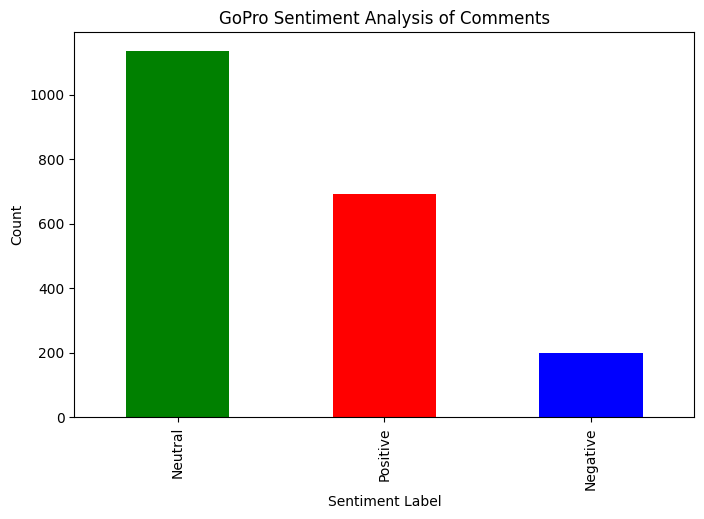

In [43]:
from textblob import TextBlob
import re

#GoPro Comments - Natural Language Processing

gopro_semantic_data = {
    'comment_id': gopro_comments_df['comment_id'],
    'post_id': gopro_comments_df['video_id'],
    'comment_text': gopro_comments_df['comment_text'],
    'commented_user_id': gopro_comments_df['commenter_id'],
    'commented_user': gopro_comments_df['commenter_name'],
    'post_date': gopro_comments_df['comment_post_date'],
    'comment_date': gopro_comments_df['comment_post_date']
}
gopro_semantic_df = pd.DataFrame(gopro_semantic_data)

# GoPro comment data cleaning and preprocessing
def comment_clean_text(gopro_comment):
    gopro_comment = re.sub(r'http\S+', '', gopro_comment)
    gopro_comment = re.sub(r'[^a-zA-Z\s]', '', gopro_comment)
    gopro_comment = gopro_comment.lower()
    return gopro_comment

# Apply the function to the 'comment_text' column
gopro_semantic_df['cleaned_gopro_comment'] = gopro_semantic_df['comment_text'].apply(comment_clean_text)

# GoPro comment sentiment analysis
def get_gopro_sentiment_info(gopro_comment):
    gopro_analysis = TextBlob(gopro_comment)
    gopro_sentiment_polarity = gopro_analysis.sentiment.polarity
    
    if gopro_sentiment_polarity > 0:
        comment_sentiment_label = "Positive"
    elif gopro_sentiment_polarity < 0:
        comment_sentiment_label = "Negative"
    else:
        comment_sentiment_label = "Neutral"
    
    return comment_sentiment_label, gopro_sentiment_polarity

gopro_semantic_df['sentiment_label'], gopro_semantic_df['sentiment_score'] = zip(*gopro_semantic_df['cleaned_gopro_comment'].apply(get_gopro_sentiment_info))

# GoPro comment sentiment analysis visualization
plt.figure(figsize=(8, 5))
gopro_semantic_df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('GoPro Sentiment Analysis of Comments')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

V) Social Network Analysis

Community Detection

This script uses the Louvain method to identify communities and visualizes the social network graph with nodes colored according to their community.
In this case, I used the YouTube comments data. The relevant attributes are likely to be commented user id, commented user name, and potentially post id. 
The NetworkX library is used to handle the creation, analysis, and visualization of the social network graph. 

pip install python-louvain

             commented_user_id commented_user_name      post_id  \
0     UC_tmHfAtUtsFH4LwBBihKKg       januda bosilu  Im8HPvQ0yys   
1     UCeT6TOnA9qh7z0cwaC4bMMQ    Kirill Emelianov  Im8HPvQ0yys   
2     UCq0baSD74sZ0Vaw24N-1R6g           Ihor Zver  Im8HPvQ0yys   
3     UCZgdydnQKn8MuSXkDDeTVjg        Аллен Авдеев  Im8HPvQ0yys   
4     UCv1lu-0eUCyneciKnoDigAQ            Sai Star  Im8HPvQ0yys   
...                        ...                 ...          ...   
2021  UCCDKl9Bf8f2N9kPphapyBcw            flyncook  DT-M1PoCmFg   
2022  UCIuCIAo5OuIaqeLb76LFg7g           RMB_m3dia  DT-M1PoCmFg   
2023  UCZGy8CMpRNkVAVtcF14OTUA       Desert Scream  DT-M1PoCmFg   
2024  UCIo2LDUNX3ZDbWQuXkJNavw        PilotGeorge.  DT-M1PoCmFg   
2025  UCcq3jCJlfKGNyQfBUzcHwow           SwikedJLA  DT-M1PoCmFg   

      gopro_community  
0                   1  
1                   2  
2                   4  
3                   7  
4                   8  
...               ...  
2021             1602  
202

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/3127869593.py:33: UserWarning:

Glyph 21555 (\N{CJK UNIFIED IDEOGRAPH-5433}) missing from current font.

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/3127869593.py:33: UserWarning:

Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/3127869593.py:33: UserWarning:

Glyph 32752 (\N{CJK UNIFIED IDEOGRAPH-7FF0}) missing from current font.

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/3127869593.py:33: UserWarning:

Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/3127869593.py:33: UserWarning:

Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.

/var/folders/7n/hj2506mx5f96h7w11f8kg2v40000gn/T/ipykernel_6439/3127869593.py:33: UserWarning:

Glyph 128153 (\N{BLUE HEART}) missing from current font.

/

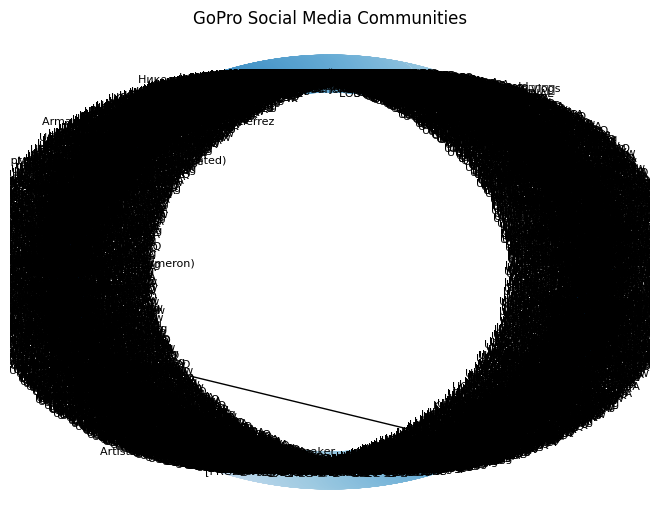

In [44]:
import networkx as nx
import community

gopro_network_data = {
    'comment_id': gopro_comments_df['comment_id'],
    'post_id': gopro_comments_df['video_id'],
    'commented_user_id': gopro_comments_df['commenter_id'],
    'commented_user_name': gopro_comments_df['commenter_name'],
    'post_date': gopro_comments_df['comment_post_date'],
    'comment_datetime': gopro_comments_df['comment_datetime']
}

gopro_network_df = pd.DataFrame(gopro_network_data)

# Create a GoPro network graph from the DataFrame
goProNetworkGraph = nx.from_pandas_edgelist(gopro_network_df, 'commented_user_id', 'commented_user_name', ['post_id'])

# Calculate the best partition for the GoPro network graph
gopro_partition = community.best_partition(goProNetworkGraph)

# Add the partition information to the DataFrame
gopro_network_df['gopro_community'] = gopro_network_df['commented_user_id'].map(gopro_partition)

# Display the GoPro network community details
print(gopro_network_df[['commented_user_id', 'commented_user_name', 'post_id', 'gopro_community']])

# Visualize the GoPro network graph
pos = nx.circular_layout(goProNetworkGraph)
node_colors = [gopro_partition[node] for node in goProNetworkGraph.nodes]
nx.draw(goProNetworkGraph, pos, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.Blues,
        font_size=8, font_color="black")
# Save the graph as a PNG file
plt.savefig('gopro_social_media_communities.png', format='png')
plt.title("GoPro Social Media Communities")
plt.show()

Centrality measurements: 
This includes measures such as degree centrality (the number of connections a user has), closeness centrality (how close a user is to all other users in the network), and betweenness centrality (how important a user is in mediating communication between other users).
YoutTube comments data used for the analysis.

In [45]:

# create a dataframe from the gopro_network_data dictionary
gopro_centrality_df = pd.DataFrame(gopro_network_data)

# create a network graph from the dataframe using the 'commented_user_id', 'commented_user_name', and 'post_id' columns
networkGraph = nx.from_pandas_edgelist(gopro_centrality_df, 'commented_user_id', 'commented_user_name', ['post_id'])

# calculate the degree centrality, betweenness centrality, and eigenvector centrality of the network graph
gopro_degree_centrality = nx.degree_centrality(networkGraph)
gopro_betweenness_centrality = nx.betweenness_centrality(networkGraph)
gopro_eigenvector_centrality = nx.eigenvector_centrality(networkGraph)

# add the centrality measures to the gopro_centrality_df dataframe
gopro_centrality_df['degree_centrality'] = gopro_centrality_df['commented_user_id'].map(gopro_degree_centrality)
gopro_centrality_df['betweenness_centrality'] = gopro_centrality_df['commented_user_id'].map(gopro_betweenness_centrality)
gopro_centrality_df['eigenvector_centrality'] = gopro_centrality_df['commented_user_id'].map(lambda x: gopro_eigenvector_centrality.get(x, 0))

# display the commented_user_id, commented_user_name, post_id, degree_centrality, betweenness_centrality, and eigenvector_centrality columns of the gopro_centrality_df dataframe
print(gopro_centrality_df[['commented_user_id', 'commented_user_name', 'post_id', 'degree_centrality', 'betweenness_centrality', 'eigenvector_centrality']])

             commented_user_id commented_user_name      post_id  \
0     UC_tmHfAtUtsFH4LwBBihKKg       januda bosilu  Im8HPvQ0yys   
1     UCeT6TOnA9qh7z0cwaC4bMMQ    Kirill Emelianov  Im8HPvQ0yys   
2     UCq0baSD74sZ0Vaw24N-1R6g           Ihor Zver  Im8HPvQ0yys   
3     UCZgdydnQKn8MuSXkDDeTVjg        Аллен Авдеев  Im8HPvQ0yys   
4     UCv1lu-0eUCyneciKnoDigAQ            Sai Star  Im8HPvQ0yys   
...                        ...                 ...          ...   
2021  UCCDKl9Bf8f2N9kPphapyBcw            flyncook  DT-M1PoCmFg   
2022  UCIuCIAo5OuIaqeLb76LFg7g           RMB_m3dia  DT-M1PoCmFg   
2023  UCZGy8CMpRNkVAVtcF14OTUA       Desert Scream  DT-M1PoCmFg   
2024  UCIo2LDUNX3ZDbWQuXkJNavw        PilotGeorge.  DT-M1PoCmFg   
2025  UCcq3jCJlfKGNyQfBUzcHwow           SwikedJLA  DT-M1PoCmFg   

      degree_centrality  betweenness_centrality  eigenvector_centrality  
0              0.000273                     0.0                0.000004  
1              0.000273                     0.0

VI) Content Publishing Calender

In [46]:
# Content Publishing Calender for Cross Post Scheduling

gopro_post_calender_data = {
    'post_id': gopro_posts_df['post_id'],
    'channel_type': gopro_posts_df['channel_type'],
    'likes': gopro_posts_df['likes_count'],
    'comments': gopro_posts_df['comments_count'],
    'views': gopro_posts_df['views_count'],
    'post_content': gopro_posts_df['post_description'],
    'post_datetime': gopro_posts_df['post_datetime']
}
gopro_post_calender_df = pd.DataFrame(gopro_post_calender_data)

# Create additional columns for gopro_post_calender_df
gopro_post_calender_df['day_of_week'] = gopro_post_calender_df['post_datetime'].dt.day_name()
gopro_post_calender_df['time_of_day'] = pd.cut(gopro_post_calender_df['post_datetime'].dt.hour, 
                                        bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 
                                        'Afternoon', 'Evening'], include_lowest=True)

gopro_post_calender_df

,post_id,channel_type,likes,comments,views,post_content,post_datetime,day_of_week,time_of_day
0,Im8HPvQ0yys,youtube,517,64,9059.0,"GoPro Awards recipient ""KWOON"" is one talented...",2023-10-06 20:15:01,Friday,Evening
1,a9PdU9xQeXk,youtube,2211,15,36251.0,It's rush hour on the Kenyan plains 🐘 $500 #Go...,2023-10-02 14:00:00,Monday,Afternoon
2,sB60FSm6fcw,youtube,14688,66,283265.0,$500 #GoProAwards recipient Sajid Chougle live...,2023-10-01 14:00:38,Sunday,Afternoon
3,XBoqsmBYG4Q,youtube,4889,15,91775.0,GoPro | NHRA Drag Racing POV in Las Vegas 🎬 #R...,2023-09-29 14:00:19,Friday,Afternoon
4,0h1aX7fQn3Y,youtube,788,33,19630.0,#GoPro #GoProSnow #HyperSmooth #Skiing #SitSki...,2023-09-29 13:00:02,Friday,Afternoon
...,...,...,...,...,...,...,...,...,...
91,3205639297159313238,instagram,14503,32,NaN,"Photo of the Day: Hole-y moly, what a view 🌊 S...",2023-10-03 19:40:07,Tuesday,Evening
92,3205497410775040108,instagram,30733,1566,934127.0,Meet Hyphen. Shot on #GoPro\n \nHyphen is a re...,2023-10-03 15:01:43,Tuesday,Afternoon
93,3204875258656204133,instagram,17546,40,NaN,Photo of the Day: Your unemployed friends on a...,2023-10-02 18:22:07,Monday,Afternoon
94,3204169680524383287,instagram,21246,48,NaN,Photo of the Day: Soak it all in 💦🌿 Snapped by...,2023-10-01 19:00:16,Sunday,Evening


Pretictive Analysis for Predict the Best Date and Time for Post Publishing
Use the Seaborn Library for the analysis

pip install seaborn

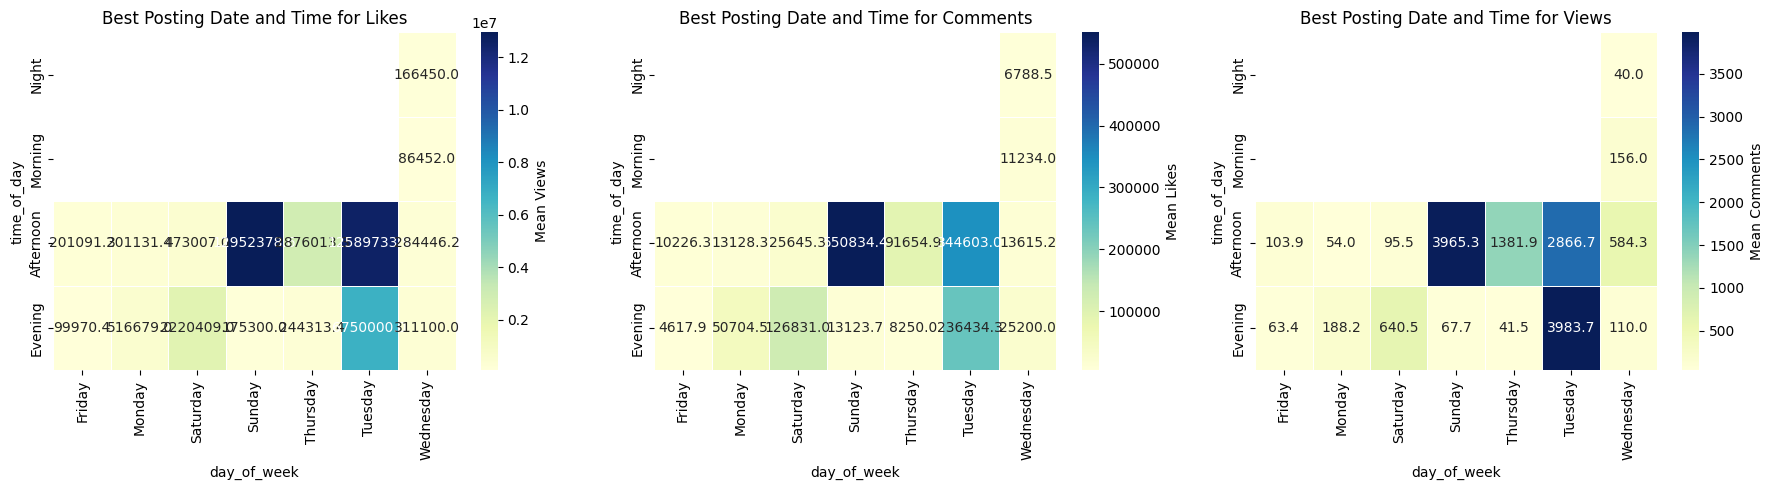

In [47]:
import seaborn as sns

# Create pivot tables for likes, comments, and views
gopro_pivot_likes = gopro_post_calender_df.pivot_table(index='time_of_day', columns='day_of_week', values='likes', aggfunc='mean')
gopro_pivot_comments = gopro_post_calender_df.pivot_table(index='time_of_day', columns='day_of_week', values='comments', aggfunc='mean')
gopro_pivot_views = gopro_post_calender_df.pivot_table(index='time_of_day', columns='day_of_week', values='views', aggfunc='mean')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# GoPro Views heatmap
sns.heatmap(gopro_pivot_views, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Mean Views'}, ax=axes[0])
axes[2].set_title('Best Posting Date and Time for Views')

# GoPro Likes heatmap
sns.heatmap(gopro_pivot_likes, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Mean Likes'}, ax=axes[1])
axes[0].set_title('Best Posting Date and Time for Likes')

# GoPro Comments heatmap
sns.heatmap(gopro_pivot_comments, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Mean Comments'}, ax=axes[2])
axes[1].set_title('Best Posting Date and Time for Comments')

plt.tight_layout()
plt.show()


VII) Analysis of users are currently involved with social media content

User Engagement HeatMap

This is a effective way to visualize how users are interacting with different social media posts

The heatmap visually represents the correlation between views, likes, and comments (user interactions) for the social media posts.

pip install seaborn

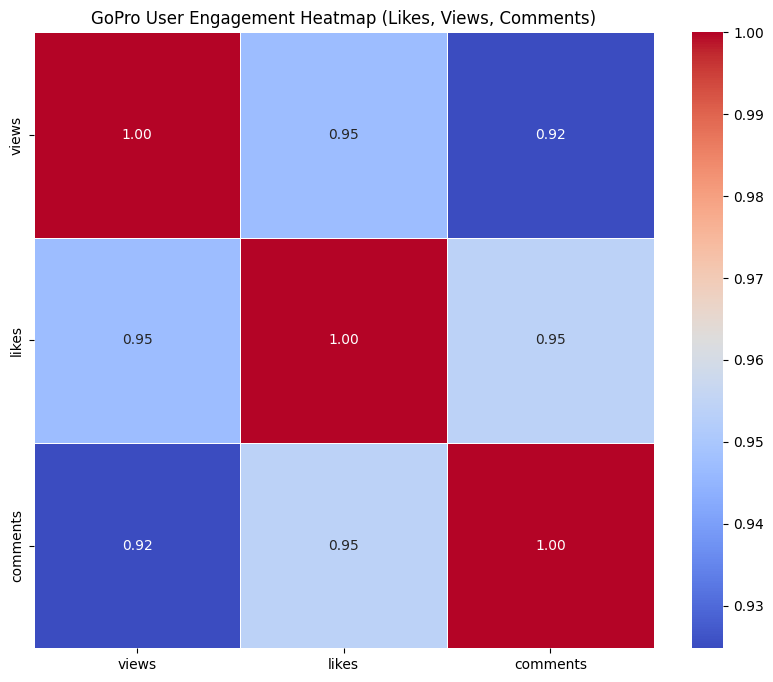

In [48]:
import seaborn as sns

#GoPro User Engagement Hashmap

gopro_user_engagement_data = {
    'post_id': gopro_posts_df['post_id'],
    'channel_type': gopro_posts_df['channel_type'],
    'likes': gopro_posts_df['likes_count'],
    'comments': gopro_posts_df['comments_count'],
    'views': gopro_posts_df['views_count'],
    'post_content': gopro_posts_df['post_description'],
    'post_datetime': gopro_posts_df['post_datetime']
}
gopro_user_engagement_df = pd.DataFrame(gopro_user_engagement_data)

# Remove duplicates based on GoPro post_id
gopro_user_engagement_df.drop_duplicates(subset='post_id', inplace=True)

# Assuming that the post_id is the index
gopro_user_engagement_df.set_index('post_id', inplace=True)

# Extract the required columns
gopro_engagement_data = gopro_user_engagement_df[['views', 'likes', 'comments']]

# Create a correlation matrix
gopro_correlation_matrix = gopro_engagement_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(gopro_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('GoPro User Engagement Heatmap (Likes, Views, Comments)')
plt.show()


Analyse the user engagement of posts over time

Engagement score = (Total interactions) / (Reach)
Total interactions is the sum of all interactions with the post, such as likes, comments, and shares. Reach is the number of people who saw the post.

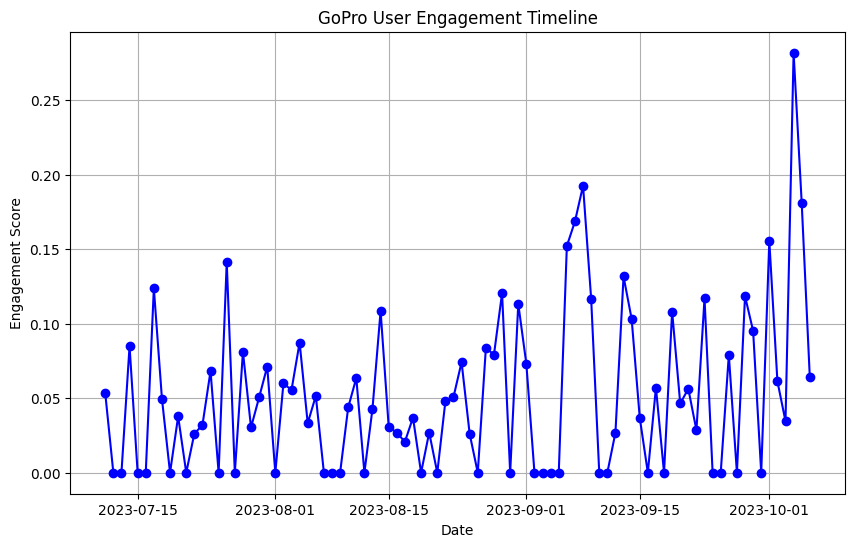

In [49]:
# Analyse the user engagement of posts over time

# Calculate engagement score (sum of likes, comments, and views)
gopro_user_engagement_df['engagement_score'] = (gopro_user_engagement_df['likes'] + gopro_user_engagement_df['comments']) / gopro_user_engagement_df['views']

# Set 'post_datetime' as the index for time-based plotting
gopro_user_engagement_df.set_index('post_datetime', inplace=True)

# Resample the data to daily frequency
resampled_df = gopro_user_engagement_df.resample('D').sum()

# Plot the engagement timeline
plt.figure(figsize=(10, 6))
plt.plot(resampled_df.index, resampled_df['engagement_score'], marker='o', linestyle='-', color='b')
plt.title('GoPro User Engagement Timeline')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.show()

GoPro - Socail Media Analitics Dashboard

Using Dash and Plotly libraries to create a dashboard.

pip install plotly

pip install dash

In [52]:

import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Create GoPro Dash App
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([

    html.H1("GoPro Social Media Analytics Dashboard", style={'text-align': 'center','color': 'Orange'}),
    
    #Table to display  GoPro channel data
    dash_table.DataTable(
        id='gopro-channel-table',
        columns=[
            {'name': 'Socaial Media Network', 'id': 'channel_type', 'editable': False},
            {'name': 'Followers', 'id': 'followers', 'editable': False},
            {'name': 'Posts', 'id': 'posts', 'editable': False}
        ],
        data=gopro_channel_data_table.to_dict('records'),
        style_table={
            'overflowX': 'auto',  # Horizontal scroll
            'border': 'thin lightgrey solid',
            'fontFamily': 'Arial, sans-serif',
            'margin': '10px'
        },
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto',
            'border-bottom': '1px solid gray'
        },
        style_cell={
            'textAlign': 'left',
            'minWidth': '50px', 'width': '50px', 'maxWidth': '50px',
            'overflow': 'hidden',
            'textOverflow': 'ellipsis',
        },
    ),

    # Table to display GoPro post statistics
    html.H2("GoPro Post Statistics", style={'color': '#FF7F50'}),
    
    # Dropdown for channel_type filter
    dcc.Dropdown(
        id='gopro-channel-dropdown',
        options=[{'label': gorpo_channel, 'value': gorpo_channel} for gorpo_channel in gopro_post_stats_df['channel_type'].unique()],
        multi=True,
        value=gopro_post_stats_df['channel_type'].unique(),
        style={'margin-bottom': '20px'}
    ),

    dash_table.DataTable(
        id='gopro_post_stats_table',
        columns=[
            {"name": gopro_col, "id": gopro_col} for gopro_col in gopro_post_stats_df.columns
            
        ],
        data=gopro_post_stats_df.to_dict('records'),
        page_size=10,
        style_table={
            'overflowX': 'auto',  # Horizontal scroll
            'border': 'thin lightgrey solid',
            'fontFamily': 'Arial, sans-serif',
            'margin': '10px'
        },
        sort_action='native',
        style_cell={
            'textAlign': 'left',
            'minWidth': '50px', 'width': '50px', 'maxWidth': '50px',
            'overflow': 'hidden',
            'textOverflow': 'ellipsis',
        },        
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold',
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto',
            'border-bottom': '1px solid gray'
        },
    ),

    # GoPro Posts - Likes vs. Comments

    html.H2(children='GoPro Posts - Likes vs. Comments', style={'color': '#FF7F50'}),

    dcc.Graph(
        id='likes-comments-scatter-plot',
        figure=px.scatter(likes_comments_df, x='Likes', y='Comments', text='channel_type', title='GoPro Social Media Posts - Likes vs. Comments')
    ),

    html.H2(children='Time Series Analysis of GoPro Posts', style={'color': '#FF7F50'}),

    dcc.Graph(
        id='gopro-time-series-plot',
        figure=px.scatter(time_series_grouped_df, x='post_date', y=['Likes', 'Comments'],
                          labels={'value': 'Engagement Count', 'variable': 'Metrics'},
                          title='Time Series Analysis of GoPro Posts Engagement')
    ),

    # GoPro - Diffusion of Information

    html.H2(children='GoPro - Diffusion of Information', style={'color': '#FF7F50'}),
    html.H3(children='GoPro Top Influential Users', style={'color': 'darkblue'}),

    # Table to display  GoPro influential users
    dash_table.DataTable(
        id='gopro-influence-user-table',
        columns=[
            {'name': 'User ID', 'id': 'gopro_user_id', 'editable': False},
            {'name': 'User Name', 'id': 'commented_user_x', 'editable': False},
            {'name': 'Influence Score (Degree Centrality)', 'id': 'influence_score', 'editable': False}
        ],
        data=gopro_influential_users_df.to_dict('records'),
        style_table={
            'overflowX': 'auto',  # Horizontal scroll
            'border': 'thin lightgrey solid',
            'fontFamily': 'Arial, sans-serif',
            'margin': '10px'
        },
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto',
            'border-bottom': '1px solid gray'
        },
        style_cell={
            'textAlign': 'left',
            'minWidth': '50px', 'width': '50px', 'maxWidth': '50px',
            'overflow': 'hidden',
            'textOverflow': 'ellipsis',
        },
    ),

    # GoPro HashTags Analysis

    html.H2(children='GoPro Hashtags Analysis', style={'color': '#FF7F50'}),

    # Word Cloud Image
    # html.Img(src='gopro_wordcloud.png', style={'width': '100%'}),
    
    # Hashtags Bar Chart

    dcc.Graph(
        id='gopro-hashtag-bar-chart',
        figure={
            'data': [
                {'x': [hashtag[0] for hashtag in gopro_most_common_hashtags], 'y': [hashtag[1] for hashtag in gopro_most_common_hashtags], 'type': 'bar', 'name': 'Hashtags'},
            ],
            'layout': {
                'title': 'Top Hashtags',
                'xaxis': {'title': 'Hashtags'},
                'yaxis': {'title': 'Frequency'},
            }
        }
    ),

    # GoPro Sentiment Analysis of comments

    html.H2(children='Sentiment Analysis of GoPro Comments', style={'color': '#FF7F50'}),
    
    dcc.Graph(
            id='gopro-sentiment-bar-plot',
            figure={
                'data': [
                    {
                        'x': gopro_semantic_df['sentiment_label'].value_counts().index,
                        'y': gopro_semantic_df['sentiment_label'].value_counts().values,
                        'type': 'bar',
                        'marker': {'color': ['blue', 'green', 'red']},
                    },
                ],
                'layout': {
                    'title': 'Distribution of Sentiment Labels of GoPro Comments',
                    'xaxis': {'title': 'Sentiment Label'},
                    'yaxis': {'title': 'Comment Count'},
                }
            },
        ),

    # GoPro User Centrality Measurements

    html.H2(children='GoPro User Centrality Measurements', style={'color': '#FF7F50'}),

    #Table to display  cenrality measurements
    dash_table.DataTable(
        id='gopro-centrality-table',
        columns=[
            {'name': 'User ID', 'id': 'commented_user_id', 'editable': False},
            {'name': 'User Name', 'id': 'commented_user_name', 'editable': False},
            {'name': 'Post ID', 'id': 'post_id', 'editable': False},
            {'name': 'Degre Centrality', 'id': 'degree_centrality', 'editable': False},
            {'name': 'Eigenvector Centrality', 'id': 'eigenvector_centrality', 'editable': False},
        ],
        data=gopro_centrality_df.to_dict('records'),
        sort_action='native',
        page_size=10,
        style_table={
            'overflowX': 'auto',  # Horizontal scroll
            'border': 'thin lightgrey solid',
            'fontFamily': 'Arial, sans-serif',
            'margin': '10px'
        },
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto',
            'border-bottom': '1px solid gray'
        },
        style_cell={
            'textAlign': 'left',
            'minWidth': '50px', 'width': '50px', 'maxWidth': '50px',
            'overflow': 'hidden',
            'textOverflow': 'ellipsis',
        },
    ),    

    # GoPro Social Media Communities
    # html.Img(src='gopro_social_media_communities.png'),

    # GoPro Content Publishing Calender

    html.H2(children='GoPro Content Publishing Calender', style={'color': '#FF7F50'}),

    # Table to display  GoPro influential users
    dash_table.DataTable(
        id='gopro-content-calender-table',
        columns=[
            {'name': 'Day of Week', 'id': 'day_of_week', 'editable': False},
            {'name': 'Time of Day', 'id': 'time_of_day', 'editable': False},
            {'name': 'Platform', 'id': 'channel_type', 'editable': False},
            {'name': 'Post Content', 'id': 'post_content', 'editable': False},
        ],
        data=gopro_post_calender_df.to_dict('records'),
        sort_action='native',
        page_size=3,
        style_table={
            'overflowX': 'auto',  # Horizontal scroll
            'border': 'thin lightgrey solid',
            'fontFamily': 'Arial, sans-serif',
            'margin': '10px'
        },
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto',
            'border-bottom': '1px solid gray'
        },
        style_cell={
            'textAlign': 'left',
            'minWidth': '50px', 'width': '50px', 'maxWidth': '50px',
            'overflow': 'hidden',
            'textOverflow': 'ellipsis',
        },
    ),

    # GoPro Content Publishing Calender - Heatmap

    html.H2(children='Predictive Analysis for Content Publishing Schedule', style={'color': '#FF7F50'}),

    # Views heatmap
    dcc.Graph(
        id='gopro-views-heatmap',
        figure=px.imshow(gopro_pivot_views, color_continuous_scale='YlGnBu', labels=dict(x="Day of Week", y="Time of Day", color="Mean Views"))
            .update_layout(title='Best Posting Date and Time for Views')
    ), 

    # Likes heatmap
    dcc.Graph(
        id='likes-heatmap',
        figure=px.imshow(gopro_pivot_likes, color_continuous_scale='YlGnBu', labels=dict(x="Day of Week", y="Time of Day", color="Mean Likes"))
            .update_layout(title='Best Posting Date and Time for Likes')
    ),

    # Comments heatmap
    dcc.Graph(
        id='comments-heatmap',
        figure=px.imshow(gopro_pivot_comments, color_continuous_scale='YlGnBu', labels=dict(x="Day of Week", y="Time of Day", color="Mean Comments"))
            .update_layout(title='Best Posting Date and Time for Comments')
    ),

    # GoPro User Engagement Heatmap

    html.H2(children='Analysis of interaction with social media content', style={'color': '#FF7F50'}),

    dcc.Graph(
        id='heatmap',
        figure=px.imshow(gopro_correlation_matrix, x=gopro_engagement_data.columns, y=gopro_engagement_data.columns)
            .update_layout(title='GoPro User Engagement Heatmap (Likes, Views, Comments)')
    ),

    # GoPro User Engagement Timeline

    dcc.Graph(
        id='gopro-engagement-timeline',
        figure={
            'data': [dict(
                x=resampled_df.index,
                y=resampled_df['engagement_score'],
                mode='lines+markers',
                marker=dict(size=8),
                line=dict(color='blue')
            )],
            'layout': dict(
                title='GoPro User Engagement Timeline',
                xaxis=dict(title='Date'),
                yaxis=dict(title='Engagement Score'),
                showlegend=False
            )
        },
    ),


])


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)